# **Data Preprocessing**

In [762]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [763]:
wine = pd.read_csv('/content/datasets_4458_8204_winequality-red.csv')

In [764]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [765]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [766]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [767]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [768]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

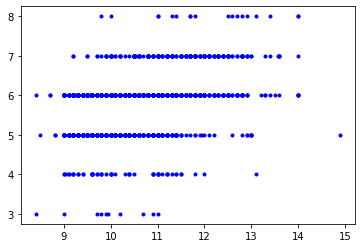

In [769]:
plt.plot(wine['alcohol'],wine['quality'],'b.')

In [770]:
x = wine.iloc[:,:-1].values
y = wine.iloc[:,-1].values

In [771]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y= le.fit_transform(y)

The quality of red wine is split based on the good and bad

In [772]:
bins = (2,6.5, 8)
name = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = name)
wine['quality']

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): [bad < good]

# **Applying Dataset in Different Regression Algorithms**

**Split Data into Train and Test Sets**

In [773]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

**Standardising Data**

In [774]:
from sklearn.preprocessing import StandardScaler

In [775]:
train = y_train.reshape(len(y_train), 1)
test = y_test.reshape(len(y_test), 1)

In [776]:
x_sc = StandardScaler()
y_sc = StandardScaler()

In [777]:
x_train = x_sc.fit_transform(x_train)
y_train = y_sc.fit_transform(train)

In [778]:
x_test = x_sc.transform(x_test)
y_test = y_sc.transform(test)

In [779]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [780]:
m_reg=LinearRegression()
p_reg=LinearRegression()
d_reg=DecisionTreeRegressor()
r_reg=RandomForestRegressor()
s_reg=SVR()

In [781]:
x_poly = PolynomialFeatures(degree=2)
x_poly = x_poly.fit_transform(x_train)

In [782]:
m_reg.fit(x_train,y_train)
p_reg.fit(x_poly,y_train)
r_reg.fit(x_train,y_train)
d_reg.fit(x_train,y_train)
s_reg.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [783]:
temp = PolynomialFeatures(degree =2)
temp = temp.fit_transform(x_test)

In [784]:
m_pred=m_reg.predict(x_test)
p_pred=p_reg.predict(temp)
r_pred=r_reg.predict(x_test)
d_pred=d_reg.predict(x_test)
s_pred=s_reg.predict(x_test)

**Finding the Score**

In [785]:
from sklearn.metrics import r2_score

In [786]:
m= r2_score(y_test,m_pred)
p= r2_score(y_test,p_pred)
r= r2_score(y_test,r_pred)
d= r2_score(y_test,d_pred)
s= r2_score(y_test,s_pred)

In [787]:
print("linear Regression:",m,"\nPolynomial Regression:",p,"\nDecision Tree Regression:",d,"\nRandom Forest Regression:",r,"\nSupport vector Regression:",s)

linear Regression: 0.3298626622671653 
Polynomial Regression: 0.30402106919237326 
Decision Tree Regression: -0.014608156824137408 
Random Forest Regression: 0.4551878501831449 
Support vector Regression: 0.3931822966416062


->  In the Applied Dataset for different Regression algorithms the Random Forest Regression gives the Best Result

# **Applying Dataset for Different Classification Algorithms**

**Split Data into Train and Test Sets**

In [788]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

**Standardising Data**

In [789]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [790]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [791]:
l_cla = LogisticRegression()
k_cla = KNeighborsClassifier()
d_cla = DecisionTreeClassifier()
r_cla = RandomForestClassifier()
s_cla = SVC(kernel='linear')
ks_cla = SVC(kernel= 'rbf')

In [792]:
l_cla.fit(x_train, y_train)
k_cla.fit(x_train, y_train)
d_cla.fit(x_train, y_train)
r_cla.fit(x_train, y_train)
s_cla.fit(x_train, y_train)
ks_cla.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [793]:
l_pred = l_cla.predict(x_test)
k_pred = k_cla.predict(x_test)
d_pred = d_cla.predict(x_test)
r_pred = r_cla.predict(x_test)
s_pred = s_cla.predict(x_test)
ks_pred = ks_cla.predict(x_test)

**Confusion Matrices For each  Classification Algorithms**

In [794]:
from sklearn.metrics import confusion_matrix

In [795]:
l_c = confusion_matrix(y_test, l_pred)
k_c = confusion_matrix(y_test, k_pred)
d_c = confusion_matrix(y_test, d_pred)
r_c = confusion_matrix(y_test, r_pred)
s_c = confusion_matrix(y_test, s_pred)
ks_c = confusion_matrix(y_test, ks_pred)

In [796]:
print("Logitic Regression:",l_c,"\nK Nearest Neighbours:",k_c,"\nDecision Trees:",d_c,"\nRandom Forest:",r_c,"\nSupport Vector Machine:",s_c,"\nKernel Support Vector Machine :",ks_c)

Logitic Regression: [[  0   0   2   0   0   0]
 [  0   0   6   4   1   0]
 [  0   0 104  30   1   0]
 [  0   0  37  90  15   0]
 [  0   0   2  16   9   0]
 [  0   0   0   1   2   0]] 
K Nearest Neighbours: [[ 0  0  0  2  0  0]
 [ 0  0  5  6  0  0]
 [ 0  0 96 37  1  1]
 [ 0  0 48 85  9  0]
 [ 0  0  6  6 13  2]
 [ 0  0  0  1  2  0]] 
Decision Trees: [[  0   0   1   1   0   0]
 [  0   3   4   3   1   0]
 [  0   7 101  25   2   0]
 [  0   3  29  95  15   0]
 [  0   0   2   6  15   4]
 [  0   0   0   2   1   0]] 
Random Forest: [[  0   0   0   2   0   0]
 [  0   0   6   5   0   0]
 [  0   0 114  18   3   0]
 [  0   0  29 105   8   0]
 [  0   0   3   7  15   2]
 [  0   0   0   1   2   0]] 
Support Vector Machine: [[  0   0   2   0   0   0]
 [  0   0   6   4   1   0]
 [  0   0 105  30   0   0]
 [  0   0  43  80  19   0]
 [  0   0   2  18   7   0]
 [  0   0   0   1   2   0]] 
Kernel Support Vector Machine : [[  0   0   1   1   0   0]
 [  0   0   8   3   0   0]
 [  0   0 101  34   0   0]
 [  0 

**Finding the Accuracy Score**

In [797]:
from sklearn.metrics import accuracy_score

In [798]:
l_a = accuracy_score(y_test, l_pred)
k_a = accuracy_score(y_test, k_pred)
d_a = accuracy_score(y_test, d_pred)
r_a = accuracy_score(y_test, r_pred)
s_a = accuracy_score(y_test, s_pred)
ks_a = accuracy_score(y_test, ks_pred)

In [799]:
print("Logitic Regression:",l_a,"\nK Nearest Neighbours:",k_a,"\nDecision Trees:",d_a,"\nRandom Forest:",r_a,"\nSupport Vector Machine:",s_a,"\nKernel Support Vector Machine :",ks_a)

Logitic Regression: 0.634375 
K Nearest Neighbours: 0.60625 
Decision Trees: 0.66875 
Random Forest: 0.73125 
Support Vector Machine: 0.6 
Kernel Support Vector Machine : 0.64375


-> In the Applied Dataset for different Classification algorithms the Random Forest Regression gives the Best Result

# **Conclusion**

In the Both Regression and Classification the Random Forest gives the Best Result